## Assingmnet No.: 5
### Name: Parkale Shreya Jagdish 
### Roll No.:2447060 
### Batch: C 
### Problem Statement – 
Perform Sentiment Analysis in the network graph using RNN.  

### A. Train RNN Model for Sentiment Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Load IMDB dataset
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [3]:
# Pad sequences
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [4]:
# Build RNN model
model = Sequential([
    Embedding(num_words, 32, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

D:\Users\shrey\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6610 - loss: 0.5950 - val_accuracy: 0.8330 - val_loss: 0.3964
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8688 - loss: 0.3197 - val_accuracy: 0.8386 - val_loss: 0.3749


###  B. Predict Sentiments on Custom Samples

In [7]:
# Decode function to get words
word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'


In [8]:
def decode_review(encoded_review):
    return ' '.join([index_word.get(i, '?') for i in encoded_review])
sample_reviews = x_test[:10]
preds = (model.predict(sample_reviews) > 0.5).astype("int").flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


### C. Visualize Sentiment in a Network Graph

In [9]:
import networkx as nx

# Create a network graph
G = nx.Graph()

# Add nodes with sentiment
for i, review in enumerate(sample_reviews):
    label = f"Review {i+1}\nSentiment: {'Positive' if preds[i] else 'Negative'}"
    G.add_node(i, label=label, sentiment='positive' if preds[i] else 'negative')


In [10]:
# Connect similar sentiments
for i in range(len(preds)):
    for j in range(i+1, len(preds)):
        if preds[i] == preds[j]:
            G.add_edge(i, j)

In [11]:
# Draw network
pos = nx.spring_layout(G, seed=42)
colors = ['green' if G.nodes[n]['sentiment'] == 'positive' else 'red' for n in G.nodes()]
labels = nx.get_node_attributes(G, 'label')


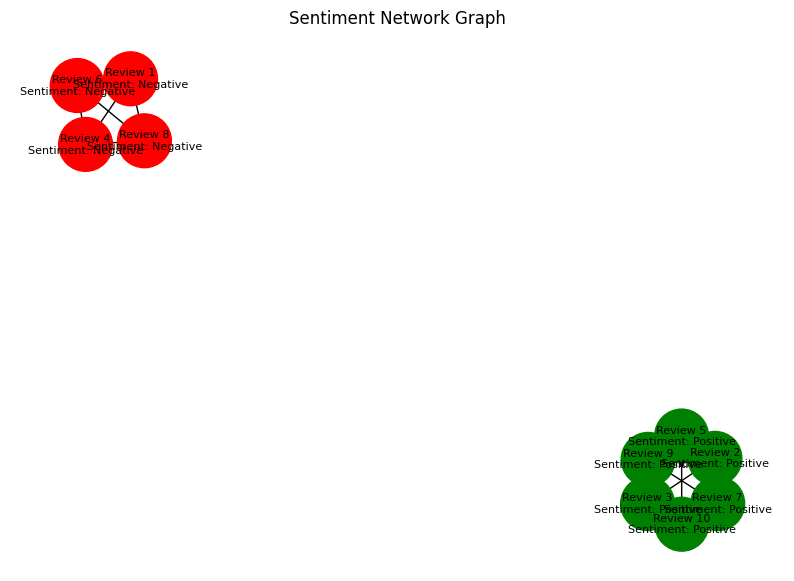

In [12]:
plt.figure(figsize=(10, 7))
nx.draw(G, pos, ax=plt.gca(), with_labels=True, node_color=colors, labels=labels,
        font_size=8, node_size=1500)
plt.title("Sentiment Network Graph")
plt.show()
